Web Scraping to gain company insights :

To scrape customer reviews of British airlines and analyze the data collected for usable insights

In [4]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from IPython.display import display, Image


In [2]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways'

In [3]:
pages = 361
page_size = 361

reviews = []
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 361 total reviews
Scraping page 2
   ---> 722 total reviews
Scraping page 3
   ---> 1083 total reviews
Scraping page 4
   ---> 1444 total reviews
Scraping page 5
   ---> 1805 total reviews
Scraping page 6
   ---> 2166 total reviews
Scraping page 7
   ---> 2527 total reviews
Scraping page 8
   ---> 2888 total reviews
Scraping page 9
   ---> 3249 total reviews
Scraping page 10
   ---> 3610 total reviews
Scraping page 11
   ---> 3971 total reviews
Scraping page 12
   ---> 4332 total reviews
Scraping page 13
   ---> 4693 total reviews
Scraping page 14
   ---> 5054 total reviews
Scraping page 15
   ---> 5415 total reviews
Scraping page 16
   ---> 5776 total reviews
Scraping page 17
   ---> 6137 total reviews
Scraping page 18
   ---> 6498 total reviews
Scraping page 19
   ---> 6859 total reviews
Scraping page 20
   ---> 7220 total reviews
Scraping page 21
   ---> 7581 total reviews
Scraping page 22
   ---> 7942 total reviews
Scraping page 23
   ---> 8303 total reviews

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Fast and friendly check in (to...
1,✅ Trip Verified | I don't understand why Brit...
2,Not Verified | I'm sure that BA have graduall...
3,✅ Trip Verified | Customer Service does not e...
4,✅ Trip Verified | Another really great pair of...


In [5]:
df.to_csv("BA_reviews.csv")

Data Cleaning

In [6]:
import pandas as pd
csv_path = "BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0        Not Verified |  Fast and friendly check in (to...
1        ✅ Trip Verified |  I don't understand why Brit...
2        Not Verified |  I'm sure that BA have graduall...
3        ✅ Trip Verified |  Customer Service does not e...
4        ✅ Trip Verified | Another really great pair of...
                               ...                        
63170    ✅ Trip Verified |  I had the best experience I...
63171    Not Verified | BA cancelled our original retur...
63172    ✅ Trip Verified | Boarding was slow and uncomf...
63173    ✅ Trip Verified |  Unfortunately having just f...
63174    Not Verified |  Utterly appalling company. We'...
Name: reviews, Length: 63175, dtype: object


In [7]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63175 entries, 0 to 63174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  63175 non-null  int64 
 1   reviews     63175 non-null  object
dtypes: int64(1), object(1)
memory usage: 987.2+ KB


,Unnamed: 0
count,63175.000000
mean,31587.000000
std,18237.195965
min,0.000000
25%,15793.500000
50%,31587.000000
75%,47380.500000
max,63174.000000


There are no null values/ missing values in out dataset. The dataset contains 63175 unique entries.
Removing (✅ Trip Verified | and Not Verified | ) to clean the data. Removing any leading or trailing spaces. Turning the review string to all lower case.

In [8]:
 df1['reviews'] = df1['reviews'].str.strip()
df1['reviews'] = df1['reviews'].str.lstrip('✅ Trip Verified')
df1['reviews'] = df1['reviews'].str.lstrip('Not Verified')
df1['reviews'] = df1['reviews'].str.lower()
print(df1)


       Unnamed: 0                                            reviews
0               0  |  fast and friendly check in (total contrast ...
1               1  |  i don't understand why british airways is c...
2               2  |  i'm sure that ba have gradually made their ...
3               3  |  customer service does not exist. one world ...
4               4  | another really great pair of flights, on tim...
...           ...                                                ...
63170       63170  |  i had the best experience i have ever had w...
63171       63171  | ba cancelled our original return flight and ...
63172       63172  | boarding was slow and uncomfortable on accou...
63173       63173  |  unfortunately having just flown in the new ...
63174       63174  |  utterly appalling company. we've flown with...

[63175 rows x 2 columns]


In [9]:
#Removing Puntuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0          fast and friendly check in total contrast to...
1          i dont understand why british airways is cla...
2          im sure that ba have gradually made their ec...
3          customer service does not exist one world em...
4         another really great pair of flights on time ...
                               ...                        
63170      i had the best experience i have ever had wi...
63171     ba cancelled our original return flight and r...
63172     boarding was slow and uncomfortable on accoun...
63173      unfortunately having just flown in the new c...
63174      utterly appalling company weve flown with th...
Name: reviews, Length: 63175, dtype: object


In [10]:
pip install TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.7/755.7 kB 60.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 39.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import nltk
nltk.download('punkt')
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float

In [14]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

  i dont understand why british airways is classified as a 4 star airline the service is really mediocre the food is untasty and insufficient for a long haul trip some members of the cabin crew are friendly but they are not attentive enough and create a very basic experience this really is all about getting from point a to b without what it used to be an enjoyable trip making experience the inflight entertainment is fairly good but you do need to bring your own water not to get dehydrated some snacks and ideally food and perhaps smile to yourself as otherwise you are faced with just a cold personality less experience
['fast', 'and', 'friendly', 'check', 'in', 'total', 'contrast', 'to', 'gatwick', 'the', 'contract', 'lounge', 'is', 'comfortable', 'and', 'spacious', 'with', 'a', 'bar', 'and', 'pleasant', 'staff', 'but', 'you', 'have', 'to', 'pay', 'for', 'alcohol', 'after', 'the', 'one', 'free', 'glass', 'of', 'wine', 'food', 'best', 'avoided', 'on', 'board', 'great', 'crew', 'and', 'din

In [15]:

from textblob import TextBlob

# Assuming you have already loaded your data into the DataFrame df1

# Function to convert a list of tokens to a string
def list_to_string(tokens):
    return " ".join(tokens)

# Function to calculate polarity and return the sentiment tag
def tag_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Convert the 'reviews' column back to a string from the list of tokens
df1['reviews'] = df1['reviews'].apply(list_to_string)

# Apply sentiment analysis and gather sentiment tags for the 'reviews' column
df1['tag'] = df1['reviews'].apply(tag_sentiment)

# Print the DataFrame with the 'tag' column added
print(df1)

       Unnamed: 0                                            reviews       tag
0               0  fast and friendly check in total contrast to g...  Positive
1               1  i dont understand why british airways is class...  Positive
2               2  im sure that ba have gradually made their econ...  Positive
3               3  customer service does not exist one world emer...  Positive
4               4  another really great pair of flights on time n...  Positive
...           ...                                                ...       ...
63170       63170  i had the best experience i have ever had with...  Positive
63171       63171  ba cancelled our original return flight and re...  Positive
63172       63172  boarding was slow and uncomfortable on account...  Positive
63173       63173  unfortunately having just flown in the new clu...  Positive
63174       63174  utterly appalling company weve flown with them...  Negative

[63175 rows x 3 columns]


In [16]:
# The percentage of various type of tag
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    40.166205
Neutral      1.385042
Positive    58.448753
dtype: float64

In [17]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


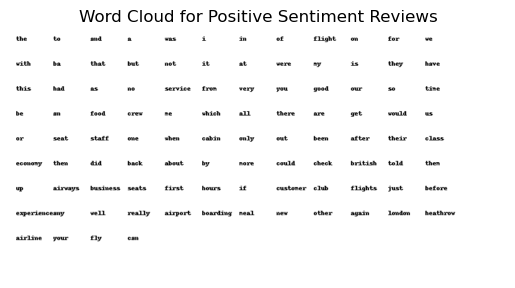

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Sample text for word cloud generation
text = " ".join(df1[df1['tag'] == 'Positive']['reviews'])

# Tokenize the text using NLTK
tokens = word_tokenize(text)

# Count the frequency of each token using Counter
word_freq = Counter(tokens)

# Create an image and draw the word cloud using Pillow
wordcloud_image = Image.new('RGB', (800, 400), color='white')
draw = ImageDraw.Draw(wordcloud_image)

# Load a default font (you may also use your preferred font from the system)
custom_font = ImageFont.load_default()

# Define the starting coordinates for drawing words
x, y = 10, 10

# Set the maximum number of words to display in the word cloud
max_words = 100

# Draw the word cloud
for word, freq in word_freq.most_common(max_words):
    draw.text((x, y), word, font=custom_font, fill='black')
    x += 60
    if x > 700:
        x = 10
        y += 40

# Show the word cloud image using matplotlib
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment Reviews")
plt.show()


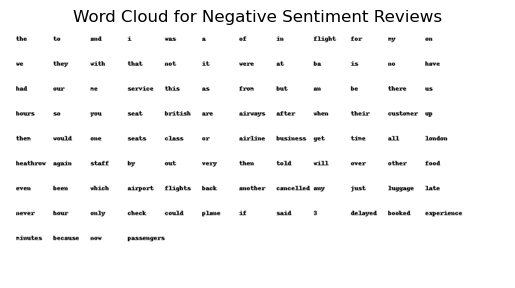

In [33]:

# Sample text for word cloud generation
text = " ".join(df1[df1['tag'] == 'Negative']['reviews'])

# Tokenize the text using NLTK
tokens = word_tokenize(text)

# Count the frequency of each token using Counter
word_freq = Counter(tokens)

# Create an image and draw the word cloud using Pillow
wordcloud_image = Image.new('RGB', (800, 400), color='white')
draw = ImageDraw.Draw(wordcloud_image)

# Load a default font (you may also use your preferred font from the system)
custom_font = ImageFont.load_default()

# Define the starting coordinates for drawing words
x, y = 10, 10

# Set the maximum number of words to display in the word cloud
max_words = 100

# Draw the word cloud
for word, freq in word_freq.most_common(max_words):
    draw.text((x, y), word, font=custom_font, fill='black')
    x += 60
    if x > 700:
        x = 10
        y += 40

# Show the word cloud image using matplotlib
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment Reviews")
plt.show()
